# PCA: batch processing and online-PCA

Group name: DataFun

## 3.1 Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

### (a) Loading the dataset, computing and plotting the first two Principal Components.

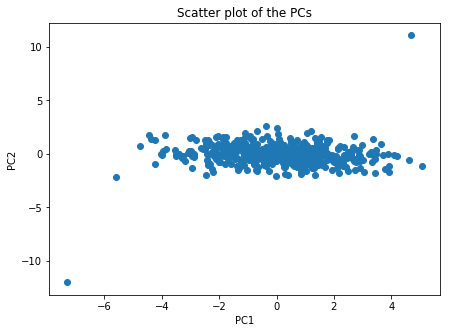

In [2]:
data2D = pd.read_csv("pca2.csv", sep=",")
meanVector2D = np.mean(data2D)
centeredData2D = data2D - meanVector2D
covarianceMatrix2D = np.cov(centeredData2D.T)
eigenvalues2D, eigenvectors2D = np.linalg.eig(covarianceMatrix2D)
orderedIndices2D = np.argsort(eigenvalues2D)[::-1]
orderedEigenvalues2D = eigenvalues2D[orderedIndices2D]
orderedEigenvectors2D = eigenvectors2D[orderedIndices2D]
pcaData2D = np.dot(centeredData2D, orderedEigenvectors2D)

# Plotting the results.
plt.figure(figsize=(7,5))
plt.scatter(pcaData2D[:,0], pcaData2D[:,1])
plt.title("Scatter plot of the PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The data looks like one bigger cluster and some outliers.

### (b) Removing required observations and redoing the steps.

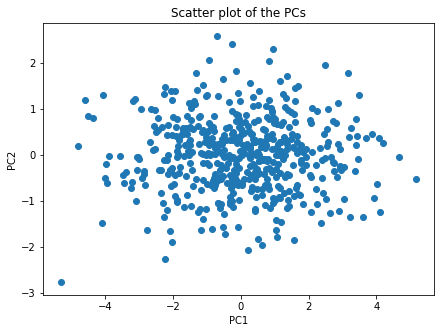

In [3]:
data2D = data2D.drop([16, 156])
meanVector2D = np.mean(data2D)
centeredData2D = data2D - meanVector2D
covarianceMatrix2D = np.cov(centeredData2D.T)
eigenvalues2D, eigenvectors2D = np.linalg.eig(covarianceMatrix2D)
orderedIndices2D = np.argsort(eigenvalues2D)[::-1]
orderedEigenvalues2D = eigenvalues2D[orderedIndices2D]
orderedEigenvectors2D = eigenvectors2D[orderedIndices2D]
pcaData2D = np.dot(centeredData2D, orderedEigenvectors2D)

# Plotting the results.
plt.figure(figsize=(7,5))
plt.scatter(pcaData2D[:,0], pcaData2D[:,1])
plt.title("Scatter plot of the PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The outliers were removed the data looks like one big cluster.

## 3.2 Whitening

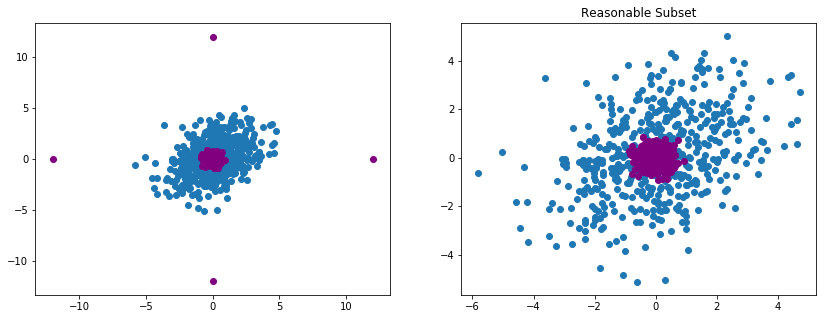

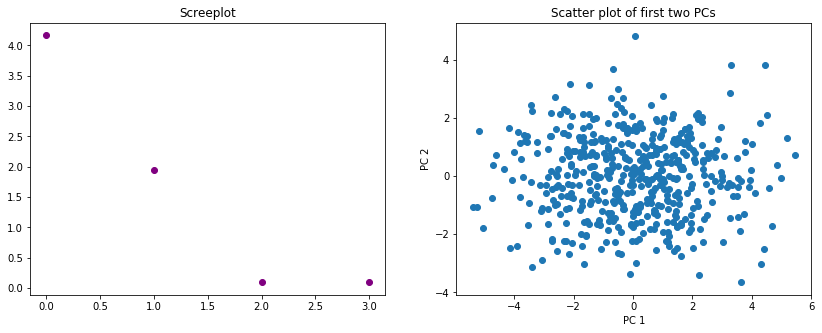

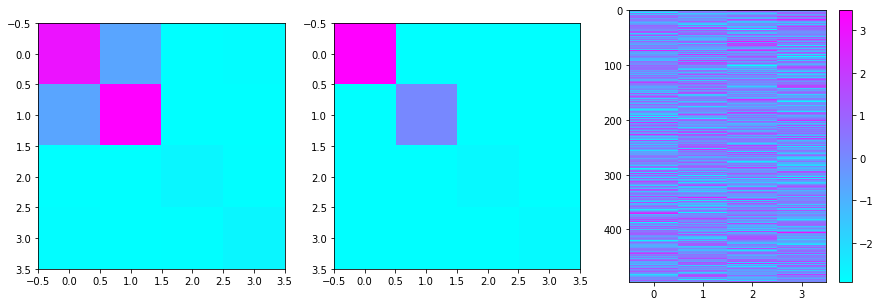

In [4]:
# Load and show outliners
dataWhite = pd.read_csv("pca4.csv", sep=",").as_matrix()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(dataWhite[:,0],dataWhite[:,1])
plt.scatter(dataWhite[:,2],dataWhite[:,3], color='purple')

# Remove outliners
for i in range(495):
    if (abs(dataWhite[:,2][i]) > 10 or abs(dataWhite[:,3][i]) > 10 ):
        dataWhite = np.delete(dataWhite, (i), axis=0)

# reasonable Subset
plt.subplot(1,2,2)
plt.scatter(dataWhite[:,0],dataWhite[:,1])
plt.scatter(dataWhite[:,2],dataWhite[:,3], color='purple')
plt.title("Reasonable Subset")
plt.show()

# PCA
meanVectorWhite = np.mean(dataWhite,axis=0)
centeredDataWhite = dataWhite - meanVectorWhite
covarianceMatrixWhite = np.cov(centeredDataWhite.T)
eigenvaluesWhite, eigenvectorsWhite = np.linalg.eig(covarianceMatrixWhite)
orderedIndicesWhite = np.argsort(eigenvaluesWhite)[::-1]
orderedEigenvaluesWhite = eigenvaluesWhite[orderedIndicesWhite]
orderedEigenvectorsWhite = eigenvectorsWhite[orderedIndicesWhite]
pcaDataWhite = np.dot(centeredDataWhite, orderedEigenvectorsWhite)
np.cov(pcaDataWhite)

# Screeplot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Screeplot")
plt.plot(orderedEigenvaluesWhite, 'o',label="original", color='purple')
# 2 PCs represent the data well (see plot)

# Plotting against two PC.
plt.subplot(1,2,2)
plt.scatter(pcaDataWhite[:,0], pcaDataWhite[:,1])
plt.title("Scatter plot of first two PCs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

#Whiten
X = centeredDataWhite
E = eigenvectorsWhite
L = la.sqrtm(np.linalg.inv(np.diag(eigenvaluesWhite)))
Z = np.dot(np.dot(X,E),L)

#Heat plots
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(covarianceMatrixWhite, cmap="cool")
plt.subplot(1,3,2)
plt.imshow(np.cov(pcaDataWhite.T), cmap="cool")
plt.subplot(1,3,3)
plt.imshow(Z, cmap="cool", aspect='auto')
plt.colorbar()
plt.show()

## 3.3 Derivation of Oja's rule

We are moving out from the following normalization, what was introduced by Oja:

$$ \Large w_i(t+1) = \frac{w_i(t)+\epsilon y(t)x_i(t)}{(\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{\frac{1}{2}}} $$

Taylor expansion with one term:

$$ f(x) = f(x_0) + f'(x-x_0)(x-x_0)$$

After Taylor expanding the right side (using quotient rule):

$$ \small \approx  \left.\frac{w_i(t)}{(\sum_{j=1}^{N} [w_j(t)]^2)^{\frac{1}{2}}} + \frac{ y(t)x_i(t) (\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{\frac{1}{2}} - (w_i(t) + \epsilon y(t)x_i(t)) \frac{1}{2} (\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{-\frac{1}{2}}\sum_{j=1}^{N} [2 (w_j(t)+\epsilon y(t)x_j(t))y(t)x_j(t)]}{\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2} \right \vert_{\epsilon=0} \epsilon$$

$$ \small \approx \frac{w_i(t)}{(\sum_{j=1}^{N} w_j(t)^2)^{\frac{1}{2}}} + \frac{ y(t)x_i(t) (\sum_{j=1}^{N} w_j(t)^2)^{\frac{1}{2}} -\frac{1}{2} w_i(t) (\sum_{j=1}^{N} w_j(t)^2)^{-\frac{1}{2}}\sum_{j=1}^{N} 2w_j(t)y(t)x_j(t)}{\sum_{j=1}^{N} w_j(t)^2}\epsilon  $$

Because of the normalization in the previous step we know: $ \sum_{j=1}^{N} w_j(t)^2 = 1 $, therefore:

$$\large = w_i(t) + \epsilon [y(t)x_i(t) - y(t) w_i(t) \sum_{j=1}^{N} w_j(t) x_j(t)] $$

With the definition of y: $ y(t)=\sum_{j=1}^{N} w_j(t) x_j(t)$:

$$\Large w_i(t+1) \approx w_i(t) + \epsilon y(t)[x_i(t) - w_i(t)y(t)] $$

This formula is what we wanted to achieve.

# 3.4

## 1) Make a scatter plot of the data and indicate the time index by the color of the datapoints



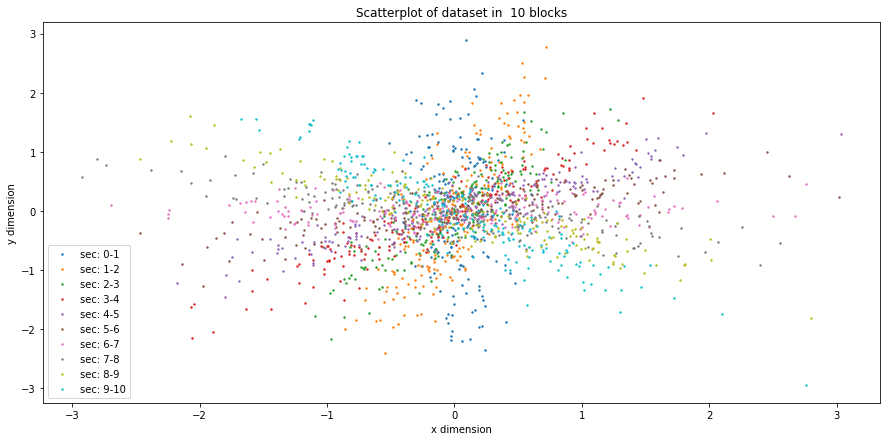

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
import matplotlib.cm as cm

dataSet = np.loadtxt('./data-onlinePCA.txt', delimiter=',',
                    skiprows=1, 
                    usecols=(1,2))

# divide the data into 10 sets covering each one second
dataBlocks = dataSet.reshape(10,200,2)
# get the mean of each set (in both dimensions)
dataMean = np.mean(dataBlocks, axis=1)


plt.figure(figsize=(15,7))
for i in range(0, dataBlocks.shape[0]):
    strLabel = 'sec: ' + str(i) + '-' + str(i+1)
    plt.scatter(dataBlocks[i,:,0], dataBlocks[i,:,1], s=2, label=strLabel)
plt.legend()
plt.title('Scatterplot of dataset in  10 blocks')
plt.xlabel('x dimension')
plt.ylabel('y dimension')
plt.show()

## 2) Determine the principal components (using batch PCA) and plot the first PC for each of the 10 blocks in the same plot as the original data

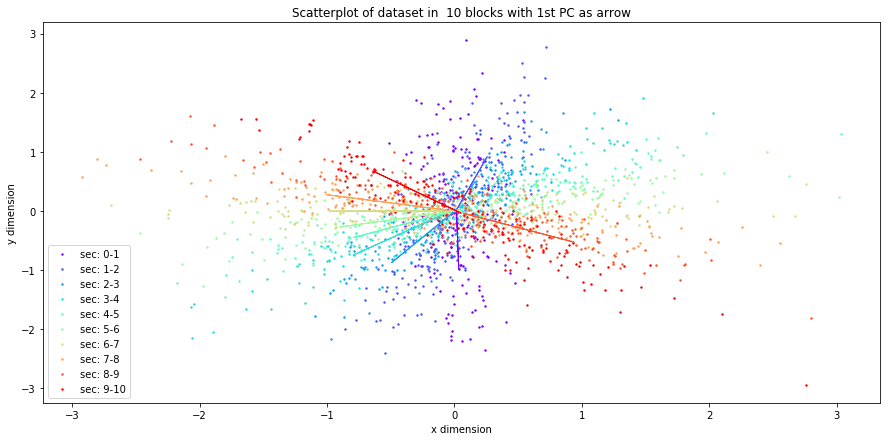

In [6]:
colors = cm.rainbow(np.linspace(0, 1, 10))

plt.figure(figsize=(15,7))
for i in range(0, dataBlocks.shape[0]):
    strLabel = 'sec: ' + str(i) + '-' + str(i+1)
    batchPCA = PCA(dataBlocks[i], standardize=False)                #calc the PCA
    plt.scatter(dataBlocks[i,:,0], dataBlocks[i,:,1], s=2, label=strLabel, color=colors[i])
    plt.arrow(dataMean[i,0], dataMean[i,1], batchPCA.Wt[0,0], batchPCA.Wt[0,1], head_width=0, head_length=0, color=colors[i])    #plot the first eigenvector
plt.legend()
plt.title('Scatterplot of dataset in  10 blocks with 1st PC as arrow')
plt.xlabel('x dimension')
plt.ylabel('y dimension')
plt.show()

## 3) Implement Oja’s rule and apply it with a learning-rate parameter ε ∈ {0.002, 0.04, 0.45} to the dataset

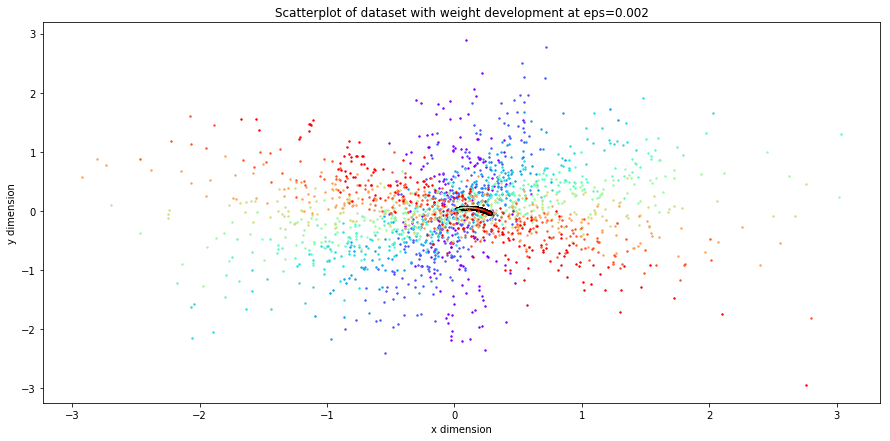

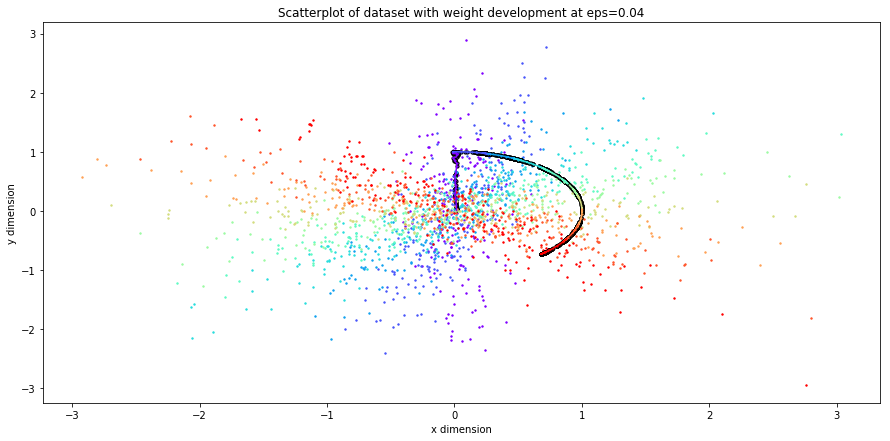

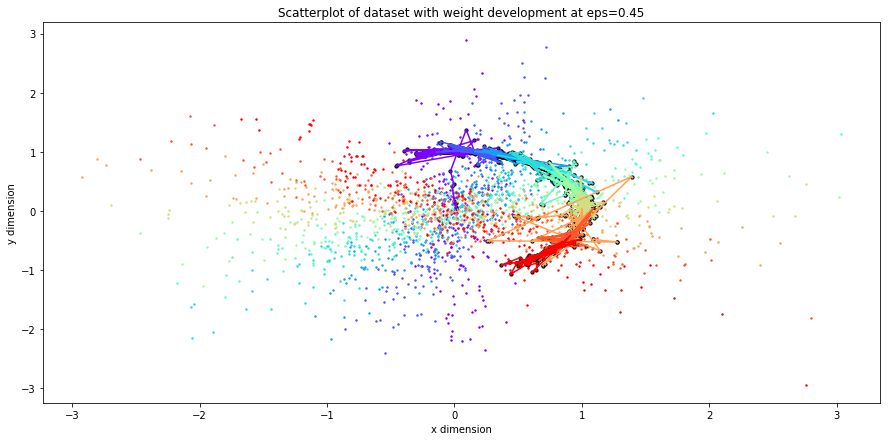

In [7]:
eps = [0.002, 0.04, 0.45]
for e in eps:
    
    #init required arrays
    plt.figure(figsize=(15,7))
    wArray = np.zeros((2000,2))
    
    #we initialize w with the mean of the first datablock - could be initialized with other values
    w = np.array([dataMean[0,0], dataMean[0,1]]) 
    
    # for each datapoint apply Oja's rule successively
    for i in range(0, dataSet.shape[0]):
        x = dataSet[i]
        y = np.dot(w.T, x)
        dW = e*y*(x-y*w)
        w = w + dW
        wArray[i] = w
    
    #plot the weights and show their development
    wArray = wArray.reshape(10,200,2)
    for i in range(0, dataBlocks.shape[0]):
        plt.scatter(dataBlocks[i,:,0], dataBlocks[i,:,1], s=2, color=colors[i])
        plt.plot(wArray[i,:,0], wArray[i,:,1], color=colors[i], linestyle='-')
        plt.scatter(wArray[i,:,0], wArray[i,:,1], s=10, facecolor=colors[i], edgecolor='k')
    plt.title('Scatterplot of dataset with weight development at eps=' + str(e))
    plt.xlabel('x dimension')
    plt.ylabel('y dimension')
    plt.show()

#### Interpretation of results:
When applying online PCA, the continuos update of the weights with datapoints leads them
to follow the first PCA of the data.
The learning rate (epsilon) determines how 'strong' or 'fast' the weights follow the new 
information given by each datapoint.
If the learning rate is very small, then each datapoint has minimal influence on the weights 
and they follow the first PC very slowely. The data is underfitted and a bad initial guess
for the weights might result in the weights never getting close to the first PC, if there are 
not enough datapoints (see first plot below).
If the learning rate is very big, then each datapoint strongly influences the weights. Each datpoint
leads to a jump of the weights (as seen in the third plot below). The data is overfitted and outliers 
might move the weights far away from the real 1st PC.
All together this means that the learning rate (and the initial guess) have to be chosen with care to
avoid under- and overfitting and getting a good estimate for the first PC.